In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

In [4]:
apple = pd.read_csv("apple.csv")
apple.tail(1)

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
1761,2016-12-30,116.65,117.2,115.43,115.82,30586265.0,0.0,1.0,115.209202,115.752409,114.004271,114.389454,30586265.0


In [53]:
#apple1 = apple[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
apple1 = apple.iloc[:, 0:6]
apple1.tail()

,Date,Open,High,Low,Close,Volume
1757,2016-12-23,115.59,116.5200,115.59,116.52,14249484.0
1758,2016-12-27,116.52,117.8000,116.49,117.26,18296855.0
1759,2016-12-28,117.52,118.0166,116.20,116.76,20905892.0
1760,2016-12-29,116.45,117.1095,116.40,116.73,15039519.0
1761,2016-12-30,116.65,117.2000,115.43,115.82,30586265.0


In [54]:
apple1.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

In [55]:
#Transfrom the Date column as a datetime type
apple1.Date = pd.to_datetime(apple1.Date)
apple1['Date'].head()

0   2010-01-04
1   2010-01-05
2   2010-01-06
3   2010-01-07
4   2010-01-08
Name: Date, dtype: datetime64[ns]

In [56]:
apple1 = apple1.set_index('Date')
apple1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0
2010-01-05,214.60,215.59,213.25,214.38,21496600.0
2010-01-06,214.38,215.23,210.75,210.97,19720000.0
2010-01-07,211.75,212.00,209.05,210.58,17040400.0
2010-01-08,210.30,212.00,209.06,211.98,15986100.0


In [57]:
# Is there any duplicate dates?
apple1.index.is_unique

True

In [58]:
# Ops... it seems the index is from the most recent date.Make the first entry the oldest date.
apple1 = apple1.sort_index(ascending= True)
apple1.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0
2010-01-05,214.60,215.59,213.25,214.38,21496600.0
2010-01-06,214.38,215.23,210.75,210.97,19720000.0
2010-01-07,211.75,212.00,209.05,210.58,17040400.0
2010-01-08,210.30,212.00,209.06,211.98,15986100.0


In [71]:
#get the last business day of each month#获取每个月最后一个交易日数据
apple_month = apple1.resample('BM').mean()
apple_month.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-29,209.409474,211.227568,205.300579,207.715737,2.851315e+07
2010-02-26,198.091842,200.455263,196.322632,198.795000,2.025579e+07
2010-03-31,222.776965,224.680430,221.285217,223.410648,1.887294e+07
2010-04-30,251.013333,253.136667,248.119767,251.148548,2.103253e+07
2010-05-31,251.979905,255.618000,244.823000,251.461200,3.229046e+07


In [75]:
#apple1.loc[['2010-03-31','2010-04-30'], ['Open', 'High', 'Low', 'Close', 'Volume']]# 和上面的结果对照的迷思？

labels = ['2010-01-29','2010-03-31','2010-04-30']
apple1.loc[apple1.index.intersection(labels)].reindex(labels)


,Open,High,Low,Close,Volume
2010-01-29,201.08,202.20,190.25,192.063,44498300.0
2010-03-31,235.49,236.61,234.46,235.000,15380700.0
2010-04-30,269.31,270.57,261.00,261.090,19373700.0


In [101]:
# what is the difference in days between the first day and the oldest
(apple1.index.max()- apple1.index.min()).days

2552

In [103]:
#How many months in the data we have?
apple_months = apple1.resample('BM').mean()
len(apple_months.index) 

84

In [109]:
#转换日期类型
apple.Date = pd.to_datetime(apple.Date)
apple['Date'].head(2)

0   2010-01-04
1   2010-01-05
Name: Date, dtype: datetime64[ns]

In [112]:
#设置Date为索引
apple.set_index('Date', inplace= True)
apple.head(1)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.5,212.38,214.01,17633200.0,0.0,1.0,27.42873,27.56624,27.29379,27.503268,123432400.0


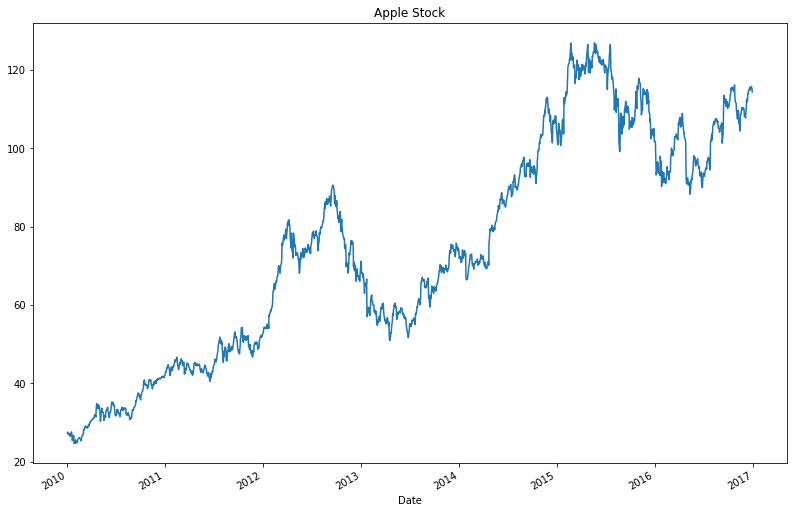

In [113]:
#画图
#plot the "Adj Close" value. set the size of the figure to 13.5 *9 inches
appl_open = apple['Adj. Close'].plot(title = "Apple Stock")

#change the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

In [76]:
import pandas as pd
import numpy as np

In [78]:
#附加：
ccc = pd.DataFrame(index =pd.date_range(start= '20160101', end= '20161230', freq= 'BM'), data = np.arange(12))
ccc.index.name = "date"
ccc

,0
date,
2016-01-29,0
2016-02-29,1
2016-03-31,2
2016-04-29,3
2016-05-31,4
2016-06-30,5
2016-07-29,6
2016-08-31,7
2016-09-30,8


In [89]:
ccc.index

DatetimeIndex(['2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29',
               '2016-05-31', '2016-06-30', '2016-07-29', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30'],
              dtype='datetime64[ns]', name='date', freq='BM')

In [99]:
ccc[(ccc.index == '2016-06-30') | (ccc.index == '2016-09-30')]

,0
date,
2016-06-30,5
2016-09-30,8


In [100]:
ccc.iloc[:3]

,0
date,
2016-01-29,0
2016-02-29,1
2016-03-31,2
